In [1]:
# =============================================================================
# Firefly Algorithm for 3D Structure Optimization Using a Force Field (Lennard-Jones)
# =============================================================================
# In this example, we simulate the optimization of a molecular (or cluster) 3D structure
# using a simple force field based on the Lennard-Jones potential. The objective is to
# minimize the total potential energy of a cluster of atoms. We use the Firefly Algorithm
# (FA) to search for the lowest energy configuration, while visualizing the process.

# =============================================================================
# 1. Import Libraries and Set Environment
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
import random
import warnings

# Suppress warnings and set plot style
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [2]:
# =============================================================================
# 2. Define the Force Field: Lennard-Jones Potential and Brightness Function
# =============================================================================
# The Lennard-Jones (LJ) potential describes the interaction between a pair of neutral atoms.
# For a pair of atoms at distance r:
#     V(r) = 4 * ε * [(σ/r)^12 - (σ/r)^6]
# Here, we set ε = 1 and σ = 1 for simplicity.
# The total energy of a structure (cluster) is the sum of LJ interactions over all unique pairs.

# Define the number of atoms in the cluster
n_atoms = 5
dim = n_atoms * 3  # Each atom has 3 coordinates (x, y, z)

def lj_potential(structure, epsilon=1.0, sigma=1.0):
    """
    Computes the Lennard-Jones potential energy of a structure.

    Parameters:
        structure (np.array): 1D array of length n_atoms*3 representing atom coordinates.
        epsilon (float): Depth of the potential well.
        sigma (float): Finite distance at which the inter-particle potential is zero.

    Returns:
        float: Total potential energy of the structure.
    """
    # Reshape structure into (n_atoms, 3) for coordinates of each atom
    atoms = structure.reshape(n_atoms, 3)
    energy = 0.0
    # Sum the LJ interactions for each unique pair of atoms
    for i in range(n_atoms):
        for j in range(i + 1, n_atoms):
            r = np.linalg.norm(atoms[i] - atoms[j])
            energy += 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return energy

# Define brightness as a measure of fitness.
# Since our goal is to minimize energy, we define brightness as -Energy.
# A lower energy (more negative) will give a higher brightness.
def brightness(structure):
    """
    Computes the brightness of a candidate structure.

    Parameters:
        structure (np.array): Candidate structure as a 1D array.

    Returns:
        float: Brightness (higher is better).
    """
    E = lj_potential(structure)
    return -E  # Lower energy => higher brightness

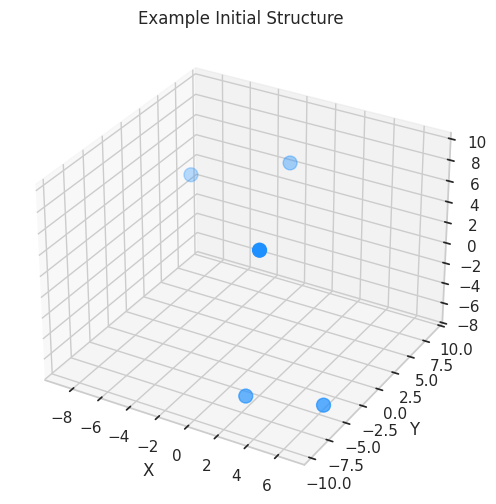

In [3]:
# =============================================================================
# 3. Initialization of Fireflies (Candidate Structures)
# =============================================================================
# We represent each candidate structure as a 1D array of dimension (n_atoms*3).
# Each coordinate is initialized randomly within defined bounds.
lb, ub = -10, 10  # Lower and upper bounds for each coordinate

def initialize_fireflies(n_fireflies, dim):
    """
    Initializes fireflies with random positions within the search space.

    Parameters:
        n_fireflies (int): Number of candidate structures.
        dim (int): Dimensionality of each candidate.

    Returns:
        np.array: Array of shape (n_fireflies, dim) with candidate structures.
    """
    return np.random.uniform(lb, ub, (n_fireflies, dim))

# Visualize an example candidate structure (3D scatter plot of atom positions)
def plot_structure(structure, title="Structure"):
    """
    Plots a 3D structure (atom positions) as a scatter plot.

    Parameters:
        structure (np.array): 1D array of length n_atoms*3.
        title (str): Plot title.
    """
    atoms = structure.reshape(n_atoms, 3)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(atoms[:, 0], atoms[:, 1], atoms[:, 2], color='dodgerblue', s=100)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Initialize fireflies (candidate structures)
num_fireflies = 40
fireflies = initialize_fireflies(num_fireflies, dim)

# Plot one random candidate structure from the initial population
plot_structure(fireflies[0], title="Example Initial Structure")

In [4]:
# =============================================================================
# 4. Firefly Algorithm Components: Movement Operator
# =============================================================================
# Each firefly moves towards a brighter (better) one. The movement is influenced by the attractiveness,
# which decreases with the square of the distance between fireflies.
# The movement equation for firefly i towards j:
#     x_i = x_i + β * (x_j - x_i) + α * (random vector - 0.5)
# where β = β0 * exp(-γ * r_ij^2)

# FA parameters
alpha = 0.3       # Randomness parameter
beta0 = 1.0       # Base attractiveness
gamma = 0.05      # Light absorption coefficient

def move_firefly(i, j, fireflies):
    """
    Moves firefly i towards firefly j based on relative brightness and distance.

    Parameters:
        i (int): Index of firefly to move.
        j (int): Index of target (brighter) firefly.
        fireflies (np.array): Array of candidate structures.

    Returns:
        np.array: Updated position of firefly i.
    """
    # Calculate Euclidean distance between fireflies i and j in the high-dimensional space
    r_ij = np.linalg.norm(fireflies[i] - fireflies[j])
    beta = beta0 * np.exp(-gamma * (r_ij ** 2))
    # Movement: attraction term plus a random term
    step = beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(dim) - 0.5)
    new_position = fireflies[i] + step
    # Enforce the boundaries of the search space for each coordinate
    new_position = np.clip(new_position, lb, ub)
    return new_position


Iteration 1: Best Brightness = 0.189, Energy = -0.189


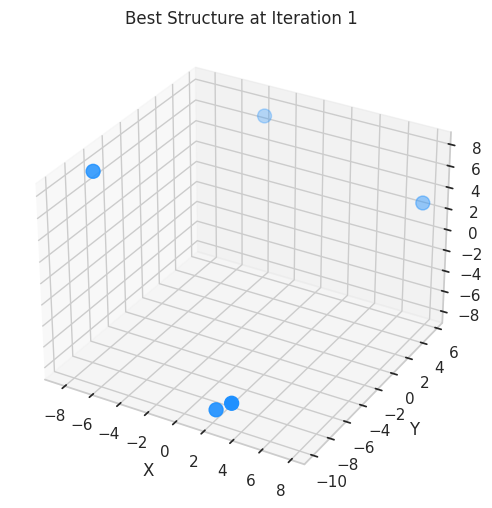

Iteration 2: Best Brightness = 0.206, Energy = -0.206
Iteration 3: Best Brightness = 0.212, Energy = -0.212
Iteration 4: Best Brightness = 0.212, Energy = -0.212
Iteration 5: Best Brightness = 0.212, Energy = -0.212
Iteration 6: Best Brightness = 0.212, Energy = -0.212
Iteration 7: Best Brightness = 0.212, Energy = -0.212
Iteration 8: Best Brightness = 0.212, Energy = -0.212
Iteration 9: Best Brightness = 0.212, Energy = -0.212
Iteration 10: Best Brightness = 0.212, Energy = -0.212


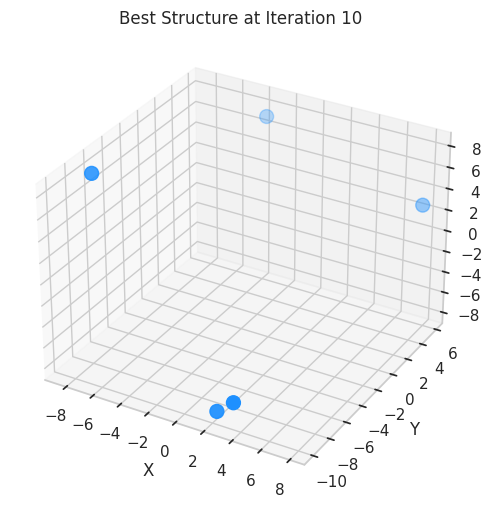

Iteration 11: Best Brightness = 0.212, Energy = -0.212
Iteration 12: Best Brightness = 0.241, Energy = -0.241
Iteration 13: Best Brightness = 0.241, Energy = -0.241
Iteration 14: Best Brightness = 0.506, Energy = -0.506
Iteration 15: Best Brightness = 0.541, Energy = -0.541
Iteration 16: Best Brightness = 0.702, Energy = -0.702
Iteration 17: Best Brightness = 0.877, Energy = -0.877
Iteration 18: Best Brightness = 0.877, Energy = -0.877
Iteration 19: Best Brightness = 0.877, Energy = -0.877
Iteration 20: Best Brightness = 0.877, Energy = -0.877


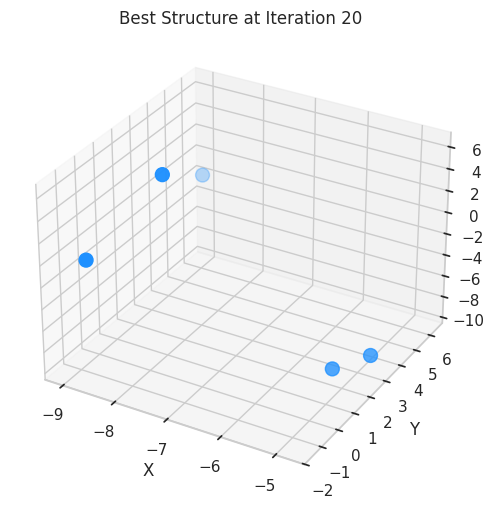

Iteration 21: Best Brightness = 0.877, Energy = -0.877
Iteration 22: Best Brightness = 0.877, Energy = -0.877
Iteration 23: Best Brightness = 0.999, Energy = -0.999
Iteration 24: Best Brightness = 0.999, Energy = -0.999
Iteration 25: Best Brightness = 0.999, Energy = -0.999
Iteration 26: Best Brightness = 0.999, Energy = -0.999
Iteration 27: Best Brightness = 0.999, Energy = -0.999
Iteration 28: Best Brightness = 0.999, Energy = -0.999
Iteration 29: Best Brightness = 0.999, Energy = -0.999
Iteration 30: Best Brightness = 0.999, Energy = -0.999


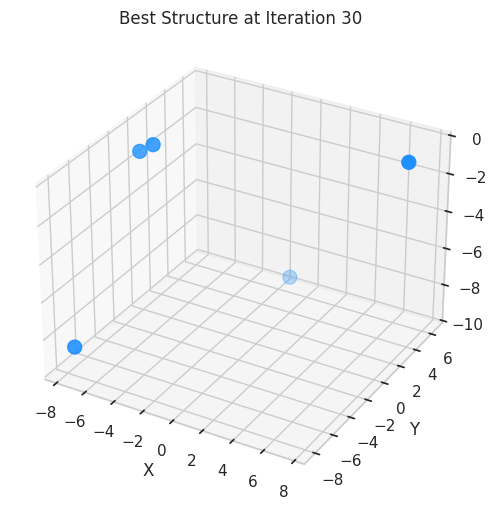

Iteration 31: Best Brightness = 0.999, Energy = -0.999
Iteration 32: Best Brightness = 0.999, Energy = -0.999
Iteration 33: Best Brightness = 0.999, Energy = -0.999
Iteration 34: Best Brightness = 0.999, Energy = -0.999
Iteration 35: Best Brightness = 0.999, Energy = -0.999
Iteration 36: Best Brightness = 0.999, Energy = -0.999
Iteration 37: Best Brightness = 0.999, Energy = -0.999
Iteration 38: Best Brightness = 0.999, Energy = -0.999
Iteration 39: Best Brightness = 0.999, Energy = -0.999
Iteration 40: Best Brightness = 0.999, Energy = -0.999


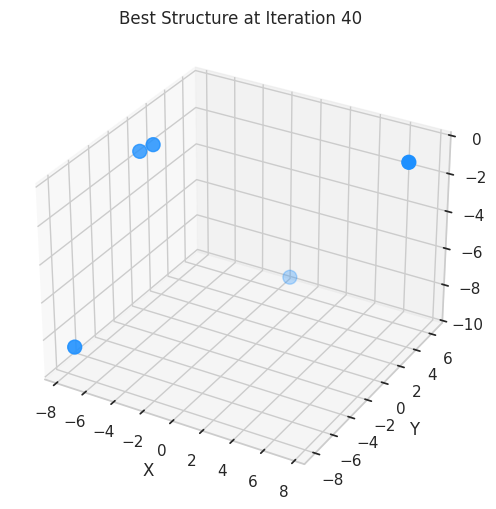

Iteration 41: Best Brightness = 0.999, Energy = -0.999
Iteration 42: Best Brightness = 0.999, Energy = -0.999
Iteration 43: Best Brightness = 0.999, Energy = -0.999
Iteration 44: Best Brightness = 0.999, Energy = -0.999
Iteration 45: Best Brightness = 0.999, Energy = -0.999
Iteration 46: Best Brightness = 1.160, Energy = -1.160
Iteration 47: Best Brightness = 1.160, Energy = -1.160
Iteration 48: Best Brightness = 1.160, Energy = -1.160
Iteration 49: Best Brightness = 1.160, Energy = -1.160
Iteration 50: Best Brightness = 1.160, Energy = -1.160


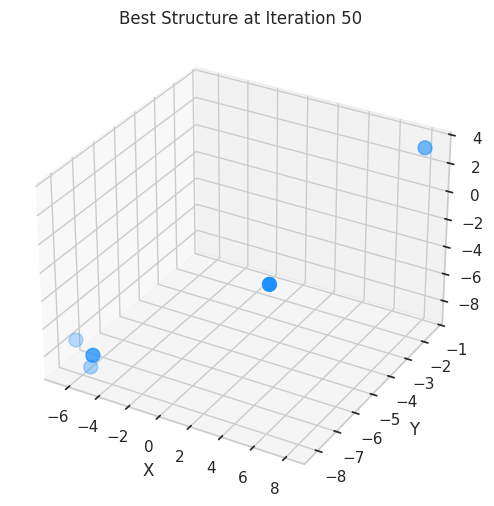

In [5]:
# =============================================================================
# 5. Main Firefly Algorithm Loop with Visualization
# =============================================================================
max_iterations = 50
best_brightness_history = []   # To record the best brightness at each iteration
best_structure_history = []    # To record the best structure per iteration
fireflies_history = []         # For storing all fireflies positions over iterations (for trajectory visualization)

for iteration in range(max_iterations):
    # Record current positions for later visualization
    fireflies_history.append(fireflies.copy())

    # Compute brightness for all fireflies (fitness = -energy)
    current_brightness = np.array([brightness(f) for f in fireflies])

    # Record the best brightness and corresponding structure in this iteration
    best_idx = np.argmax(current_brightness)
    best_brightness_history.append(current_brightness[best_idx])
    best_structure_history.append(fireflies[best_idx].copy())

    print(f"Iteration {iteration+1}: Best Brightness = {current_brightness[best_idx]:.3f}, Energy = {lj_potential(fireflies[best_idx]):.3f}")

    # Plot intermediate best structure every 10 iterations (3D scatter plot)
    if (iteration + 1) % 10 == 0 or iteration == 0:
        plot_structure(fireflies[best_idx], title=f"Best Structure at Iteration {iteration+1}")

    # Update positions: Move each firefly towards brighter ones
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if current_brightness[j] > current_brightness[i]:
                fireflies[i] = move_firefly(i, j, fireflies)


Best structure found:
[[-4.97194745 -8.18679059 -7.61141639]
 [-6.51805549 -7.89350384 -7.39997933]
 [ 2.82671949 -5.25565425 -3.52753724]
 [ 8.11848246 -1.36467936  3.31006304]
 [-5.34732418 -8.05100764 -8.77692434]]
Final Energy: -1.160


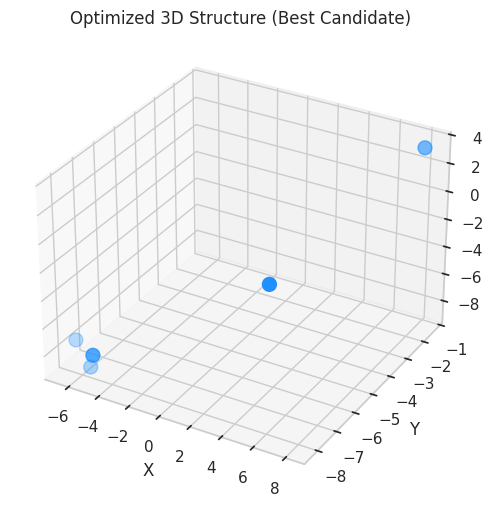

In [6]:
# =============================================================================
# 6. Final Visualization: Best 3D Structure and Energy Landscape
# =============================================================================
final_brightness = np.array([brightness(f) for f in fireflies])
best_idx_final = np.argmax(final_brightness)
best_structure = fireflies[best_idx_final]
final_energy = lj_potential(best_structure)
print("\nBest structure found:")
print(best_structure.reshape(n_atoms, 3))
print(f"Final Energy: {final_energy:.3f}")

# Plot the best structure as a 3D scatter plot
plot_structure(best_structure, title="Optimized 3D Structure (Best Candidate)")

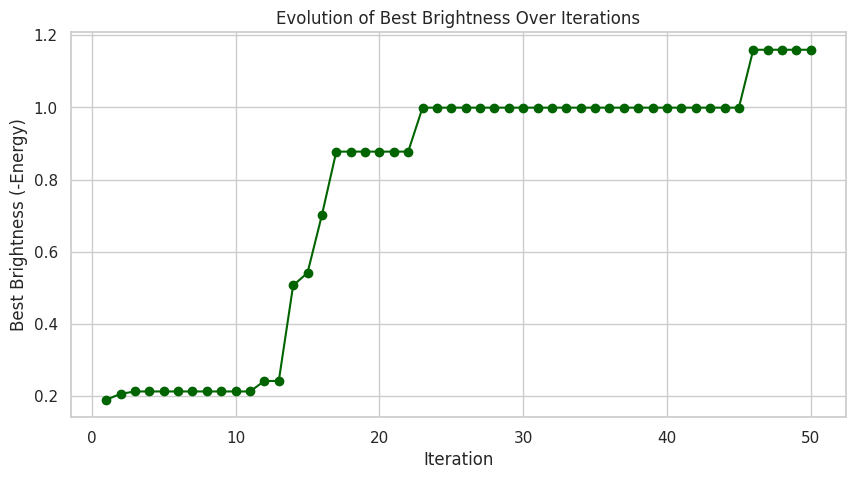

In [7]:
# =============================================================================
# 7. Plot the Evolution of the Best Brightness Over Iterations
# =============================================================================
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_iterations+1), best_brightness_history, marker='o', linestyle='-', color='darkgreen')
plt.title("Evolution of Best Brightness Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Best Brightness (-Energy)")
plt.grid(True)
plt.show()

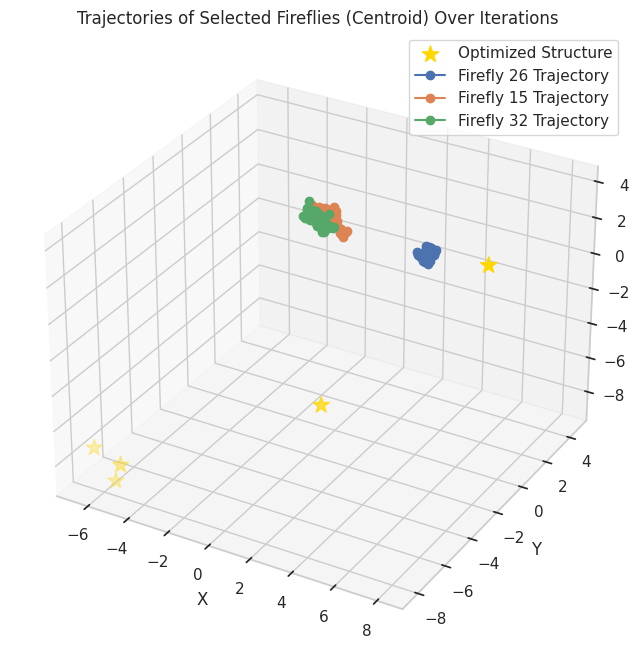

In [8]:
# =============================================================================
# 8. Trajectories of Selected Fireflies Over Iterations (3D Trajectories)
# =============================================================================
# For further insight, plot the trajectories of a few selected fireflies over iterations.
num_traj = 3  # Number of firefly trajectories to visualize
selected_indices = np.random.choice(range(num_fireflies), num_traj, replace=False)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the best structure for reference
atoms_best = best_structure.reshape(n_atoms, 3)
ax.scatter(atoms_best[:, 0], atoms_best[:, 1], atoms_best[:, 2], color='gold', s=150, label='Optimized Structure', marker='*')

# Plot trajectories for selected fireflies
for idx in selected_indices:
    traj = np.array([fireflies_history[it][idx] for it in range(max_iterations)])
    # Reshape each candidate in the trajectory to (n_atoms, 3) and plot the centroid trajectory for clarity
    centroids = np.array([candidate.reshape(n_atoms, 3).mean(axis=0) for candidate in traj])
    ax.plot(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', label=f'Firefly {idx} Trajectory')

ax.set_title("Trajectories of Selected Fireflies (Centroid) Over Iterations")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

In [9]:
# =============================================================================
# 9. Summary of Results
# =============================================================================
print("\nSummary:")
print("Best Optimized 3D Structure (Atom Coordinates):")
print(best_structure.reshape(n_atoms, 3))
print(f"Minimum Potential Energy Achieved: {final_energy:.3f}")



Summary:
Best Optimized 3D Structure (Atom Coordinates):
[[-4.97194745 -8.18679059 -7.61141639]
 [-6.51805549 -7.89350384 -7.39997933]
 [ 2.82671949 -5.25565425 -3.52753724]
 [ 8.11848246 -1.36467936  3.31006304]
 [-5.34732418 -8.05100764 -8.77692434]]
Minimum Potential Energy Achieved: -1.160
